<a href="https://colab.research.google.com/github/antvilla06/numerico/blob/master/triangulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Construcccion de Rectangulos

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib import cm

#GMSH

In [ ]:

!rm -rf *

!wget https://raw.githubusercontent.com/toastpp/toastpp/master/examples/matlab/gmsh/sphere.geo

# # # # # # # # # # Run with Gmsh # # # # # # # # # # # #
!apt-get install gmsh
!gmsh --version
!gmsh -3 sphere.geo -o sphere.msh

# # # # # # # # # # Convert mesh by meshio # # # # # # # # 
!pip install -U meshio
!apt-get install python-lxml
!meshio-convert sphere.msh sphere.vtk # Output for Paraview

# Save to your local computer
# from google.colab import files
# files.download('sphere.msh')

# print("Complete! A mesh file 'sphere.msh' is downloaded to your computer!")
# print("Install GMSH (http://gmsh.info/) on your computer to see the mesh.")

#Delauney triangulation

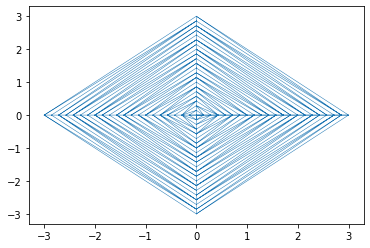

In [53]:
from scipy.spatial import Delaunay

NR = 22
NTheta = 5

Rin = 0
Rout = 3
alphaFactor = 33/64
alpha = np.pi/alphaFactor # opening angle of wed
pi=np.pi

u=np.linspace(0, 2*pi, NTheta)
v=np.linspace(Rin, Rout, NR)
u,v=np.meshgrid(u,v)
u=u.flatten()
v=v.flatten()

#evaluate the parameterization at the flattened u and v
x=v*np.cos(u)
y=v*np.sin(u)

#define 2D points, as input data for the Delaunay triangulation of U
points2D=np.vstack([u,v]).T
xy0 = np.vstack([x,y]).T
triLattice = Delaunay(points2D) #triangulate the rectangle U
triSimplices = triLattice.simplices
plt.figure()
plt.triplot(x, y, triSimplices, linewidth=0.5)

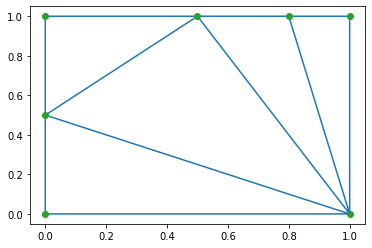

In [42]:

from scipy.spatial import Delaunay
points = np.array([[0, 0],[0,0.5],[0.8,1], [0.5,1],[0, 1], [1, 0], [1, 1]])
tri = Delaunay(points)

print(tri)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

Triangulation of surfaces

In [26]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



In [27]:

def triangulateSphere( k=30, cmap=cm.magma):
  
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y) 

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    ax = plt.figure().gca(projection='3d')
    # plot the sphere
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices,
        cmap=cmap
    )
    


plt.show()



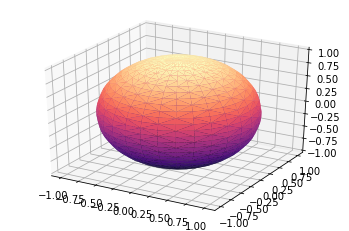

In [29]:
triangulateSphere()

## Delaunay Triangulation

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
import matplotlib.cm as cm
from scipy.spatial import Delaunay

u=np.linspace(0,2*np.pi, 24)
v=np.linspace(-1,1, 8)
u,v=np.meshgrid(u,v)
u=u.flatten()
v=v.flatten()

#evaluate the parameterization at the flattened u and v
tp=1+0.5*v*np.cos(u/2.)
x=tp*np.cos(u)
y=tp*np.sin(u)
z=0.5*v*np.sin(u/2.)

#define 2D points, as input data for the Delaunay triangulation of U
points2D=np.vstack([u,v]).T
tri = Delaunay(points2D)#triangulate the rectangle U


ImportError: ignored

In [41]:

def triangulateEllipsoid(ax, A, k=30,cmap=cm.magma):
    
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # map sphere to elipsoid
    E1 = np.zeros((k,k))
    E2 = np.zeros((k,k))
    E3 = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            xyz = np.array([S1[i,j], S2[i,j], S3[i,j]])
            [E1[i,j], E2[i,j], E3[i,j]] = A @ xyz

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    # plot the elipsoid
    ax.plot_trisurf(
        E1.flatten(), E2.flatten(), E3.flatten(),
        triangles=tri.simplices, cmap=cmap
    )

A = np.array([
    [-0.01289453, -0.02087514,  0.04109751],
    [-0.00261222, -0.01984956, -0.15409974],
    [-0.00431062,  0.07447336, -0.0295528 ]
])

plt.show()


In [40]:
triangulateEllipsoid()


TypeError: ignored